In [1]:
import random
import numpy as np
import os
import matplotlib.pyplot as plt

np.random.seed(44)
random.seed(44)

num_rows = 25
num_cols = 50
z = np.zeros((num_rows, num_cols), dtype=int)

# Creating the synthetic dataset containing underlying patterns/ Principal Components

for row in range(0, num_rows):
    for col in range(num_cols):
        z[row, col] = random.randint(-5, 5)
        
for i in range(15):
    z[0,i] = random.randint(80, 90)
    z[1,i] = random.randint(20, 30)
    z[2,i] = random.randint(40, 50)
    z[3,i] = random.randint(60, 70)
    
for i in range(16,31):
    z[15,i] = random.randint(80, 90)
    z[16,i] = random.randint(20, 30)
    z[17,i] = random.randint(40, 50)
    z[18,i] = random.randint(60, 70)
    z[19,i] = random.randint(60, 70)
    
for i in range(31,46):
    z[21,i] = random.randint(80, 90)
    z[22,i] = random.randint(20, 30)
    z[23,i] = random.randint(40, 50)
    z[24,i] = random.randint(60, 70)


np.savetxt('input_.txt', z, fmt='%d')

In [2]:
z

array([[84, 90, 90, ..., -3, -1, -2],
       [24, 22, 25, ...,  4,  2, -4],
       [48, 46, 47, ...,  1,  5,  0],
       ...,
       [ 5, -4, -4, ...,  3, -2, -4],
       [ 2,  2, -2, ...,  3,  4,  5],
       [ 0,  0, -4, ..., -3, -1,  0]])

In [3]:
# Performing SVD
U, S, Vt = np.linalg.svd(z,full_matrices=False)

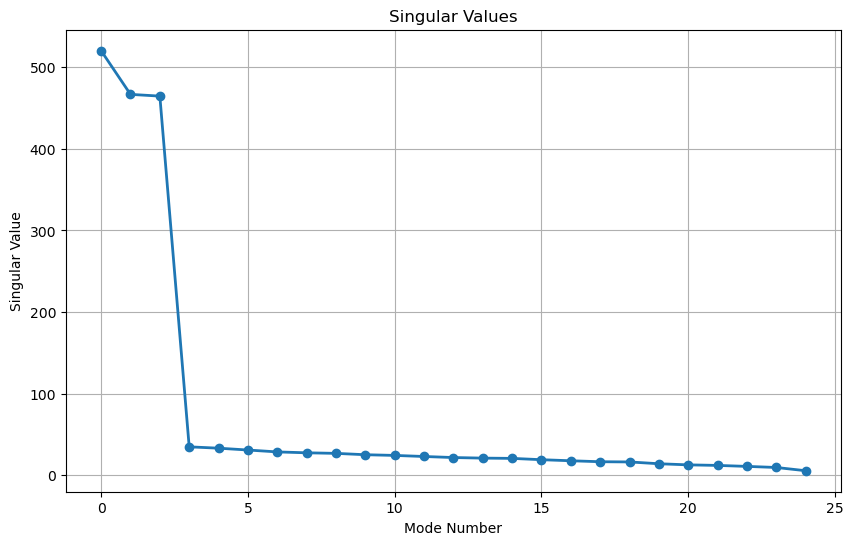

In [4]:
principal_modes = U

# Singular values
singular_values = S

# Plot the singular values to see their relative values
plt.figure(figsize=(10, 6))
plt.plot(singular_values, 'o-', linewidth=2)
plt.xlabel('Mode Number')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

In [5]:
U[:,0].shape

(25,)

In [6]:
Vt[0,:].shape

(50,)

In [7]:
S[3:] = 0
S

array([520.33679727, 466.82312817, 464.70821715,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ])

In [8]:
# Converting into diagonal matrix
S = np.diag(S)

In [9]:
# S

In [10]:
U.shape

(25, 25)

In [11]:
S.shape

(25, 25)

In [12]:
Vt.shape

(25, 50)

In [13]:
reconstructed_z = U @ S @ Vt
np.savetxt('reconstructed_input_matrix.txt', reconstructed_z, fmt='%d')

In [14]:
reconstructed_z

array([[ 8.40625216e+01,  8.74144671e+01,  8.98062112e+01, ...,
        -2.52279178e+00,  1.16618125e+00, -2.10226162e+00],
       [ 2.54432868e+01,  2.64603591e+01,  2.71970463e+01, ...,
        -7.63031658e-01,  3.57841658e-01, -6.33006225e-01],
       [ 4.45564773e+01,  4.63329823e+01,  4.76010817e+01, ...,
        -1.33703616e+00,  6.18040703e-01, -1.11427764e+00],
       ...,
       [-1.47549595e-01,  3.19891018e-01, -9.47026764e-01, ...,
        -4.42844476e-01,  2.15407182e-01, -3.37252807e-02],
       [ 8.19488152e-01,  1.82706333e+00, -5.78494489e-01, ...,
        -9.19962972e-01,  4.91877787e-01, -6.68685563e-02],
       [-1.21717056e+00,  1.48359877e-01, -3.44123108e+00, ...,
        -1.26698774e+00,  6.74019392e-01, -4.25273905e-02]])

In [15]:
# Separating the Principal Components with higest weightage
pc1 = U[:,0]
pc2 = U[:,1]
pc3 = U[:,2]

In [16]:
pc1.shape

(25,)

In [17]:
# reconstructing the matrix using only the 3 PCs

classification_mat = np.zeros((3, 50), dtype=int)
# classification_mat

In [18]:
# Taking the projections
for i in range(50):
    classification_mat[0,i] = pc1.dot(z[:,i])
    classification_mat[1,i] = pc2.dot(z[:,i])
    classification_mat[2,i] = pc3.dot(z[:,i])

In [19]:
# classification_mat

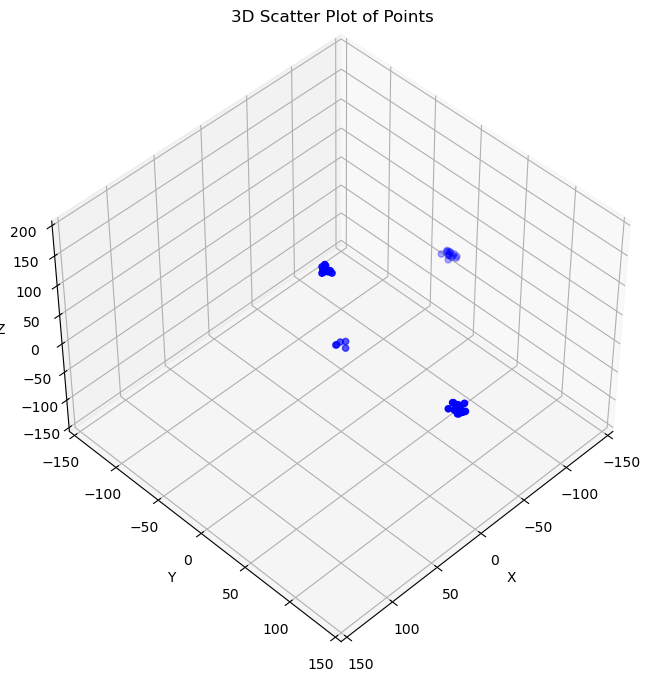

In [20]:
# Assigning the 3 components as x, y, z coordinates
x_coords = classification_mat[0,:]
y_coords = classification_mat[1,:]
z_coords = classification_mat[2,:]

# Plotting the Classified points 
# 4 clusters are formed representing 3 principal components and the noise
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Points')

ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)
ax.set_zlim(-150, 200)
ax.view_init(elev=45, azim=45) # https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html refer this to adjust azim and elev

plt.show()

In [21]:
x_coords

array([ -10,  -15,  -12,  -10,   -1,   -8,   -3,   -7,   -9,   -9,  -10,
         -9,  -10,   -6,   -8,   -1, -130, -134, -135, -137, -132, -136,
       -134, -135, -127, -133, -135, -137, -132, -132, -132,    2,    9,
          3,    3,    4,    7,    2,    5,    3,    7,    6,    3,    8,
          6,    3,    4,    3,   -4,   -1])

In [22]:
# 0 - 3
# 15 - 19
# 21 - 24

In [23]:
pc1
pc1_indices = np.argsort(np.abs(pc1))[::-1]
pc1_indices

array([15, 18, 19, 17, 16,  0, 21,  3,  2, 24,  1, 22, 23,  7,  4, 10, 14,
       13,  9,  5, 12, 20,  8, 11,  6])

In [24]:
pc2
pc2_indices = np.argsort(np.abs(pc2))[::-1]
pc2_indices

array([ 0,  3,  2,  1, 21, 24, 15, 19, 18, 23, 16, 22, 17,  6,  8,  4, 12,
        7, 10, 14, 20,  9, 11,  5, 13])

In [25]:
pc3
pc3_indices = np.argsort(np.abs(pc3))[::-1]
pc3_indices

array([21, 24, 23, 22,  0,  3,  2, 15,  1,  4, 11, 19,  6, 18,  5, 17, 16,
       13,  9,  7,  8, 20, 12, 14, 10])